In [3]:
import pandas as pd

In [2]:
!pip install pandas

  Using cached pytz-2020.5-py2.py3-none-any.whl (510 kB)


In [4]:
df = pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [10]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [12]:
#missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
final_df = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [17]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
final_df['current_year'] = 2020

In [19]:
final_df['age of car'] = final_df['current_year'] - final_df['Year']

In [20]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [21]:
final_df.drop(columns=['Year' , 'current_year'] , axis=1 , inplace=True)

In [23]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,age of car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [24]:
final_df = pd.get_dummies(final_df , drop_first = True)

In [25]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [27]:
final_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'age of car',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [28]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
age of car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [30]:
!pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [32]:
!pip install matplotlib

In [44]:
!pip install scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [34]:
import matplotlib.pyplot as plt

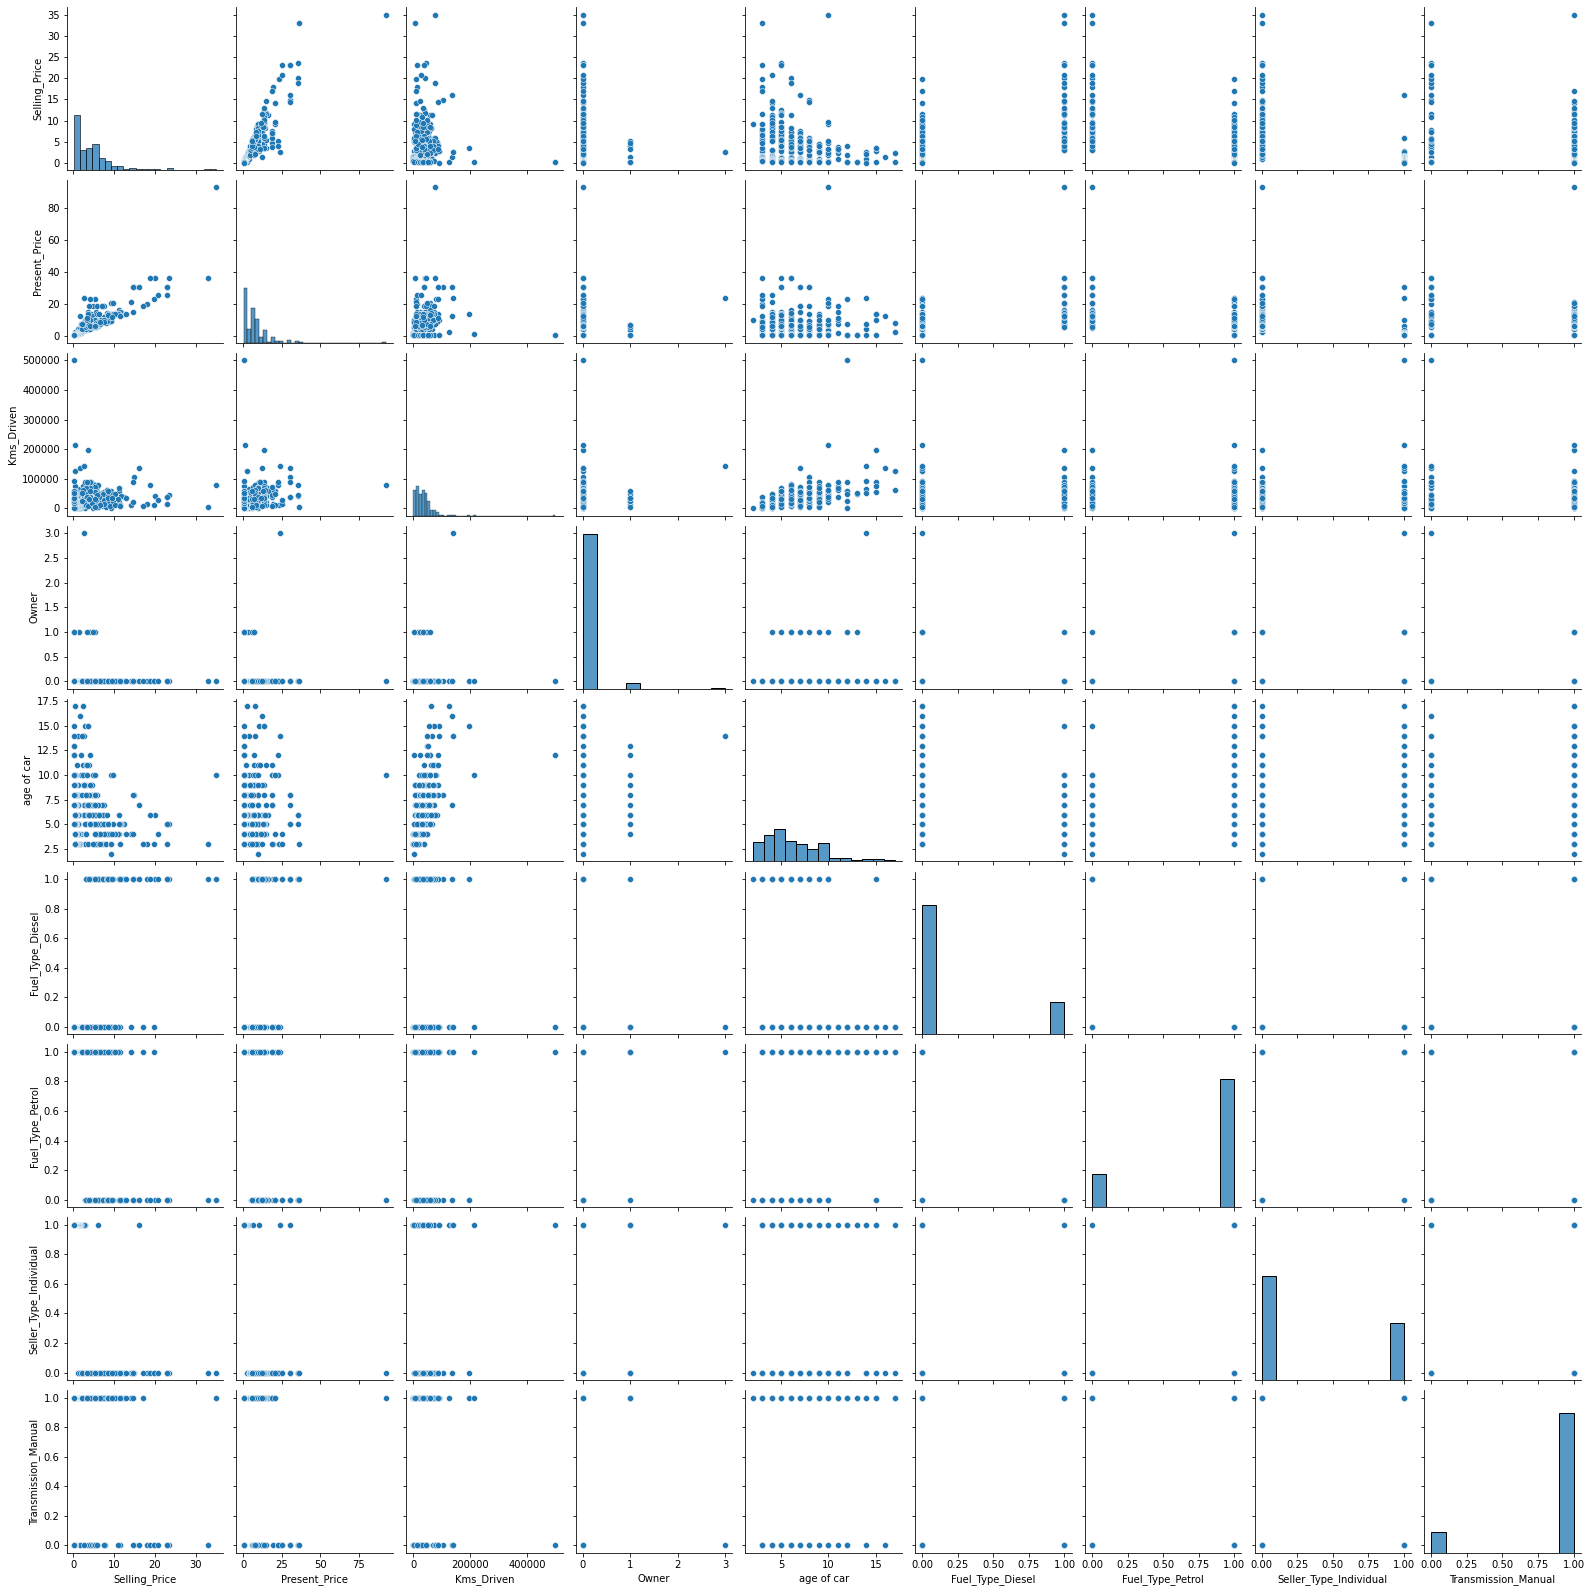

In [31]:
import seaborn as sn
sn.pairplot(final_df)

In [39]:
%matplotlib inline
corrmap = final_df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

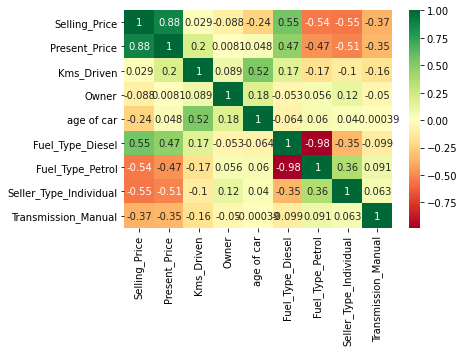

In [40]:
g = sn.heatmap(final_df[top_corr_features].corr() , annot= True , cmap = 'RdYlGn')

In [41]:
#independent and dependent features
X = final_df.iloc[: , 1:]
Y = final_df.iloc[: , 0]

In [42]:
X.head()

,Present_Price,Kms_Driven,Owner,age of car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [43]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [46]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor

In [47]:
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [49]:
print(model.feature_importances_)

[0.40609171 0.04338888 0.00093184 0.07660264 0.2087589  0.01121867
 0.11709505 0.13591231]


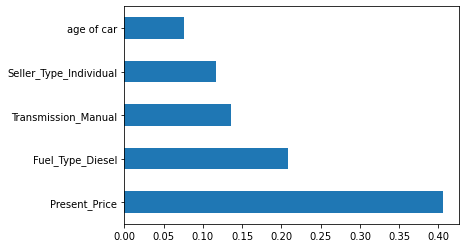

In [50]:
feat_importances = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [54]:
X_train.shape

(240, 8)

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [57]:
#hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100 , stop=1200 , num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [58]:
#Randomized Search CV

#number of tress in random forest
n_estimators = [int(x) for x in np.linspace(start=100 , stop=1200 , num=12)]

#number of features to be considered at each split
max_features = ['auto' , 'sqrt']

#max number of leaves in a tree
max_depth = [int(x) for x in np.linspace(start=5,stop=60,num=6)]

#Min number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#min num of samples reqd at each leaf node
min_samples_leaf = [1,2,5,10]

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#random grid

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 16, 27, 38, 49, 60], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [63]:
rf = RandomForestRegressor()

In [64]:
rf_random = RandomizedSearchCV(estimator = rf , param_distributions=random_grid , scoring = 'neg_mean_squared_error' , n_iter = 10 , cv=5 , verbose=2 , random_state=42 , n_jobs=1)

In [65]:
rf_random.fit(X_train , Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=16, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 16, 27, 38, 49, 60],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
predictions = rf_random.predict(X_test)

In [67]:
predictions

array([ 5.19932103, 22.23775517,  6.71388817,  0.23828171,  2.04756621,
        7.6122665 ,  2.80807974,  5.18844735,  0.87858632,  7.59155967,
        2.94865299,  5.45881628,  4.77790432,  4.95066133,  0.37071421,
        2.94250301,  1.13903561,  2.69906517,  4.08783573,  7.58166254,
        0.43988972,  1.13658454,  8.24978976,  5.45881628, 10.42569692,
        5.20579434,  1.13949692,  7.46892432,  2.75228561,  4.48280684,
        4.15609439,  1.79954909, 14.00595297,  0.53916965,  2.80137857,
        1.13423464,  1.29969236,  3.82029234,  9.97759051,  4.74823759,
        4.89732976,  4.94336507,  5.51886488,  6.58771789,  3.78925231,
        0.49943816, 11.22238556,  2.80807974,  0.67112681,  4.14133235,
        4.29498584,  5.55043362,  0.604921  ,  4.52335729,  4.53280283,
        5.44144005,  0.43202716,  3.98202318,  0.44722249,  5.0062072 ,
        7.61321465])

c:\users\acer\anaconda3\envs\car_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

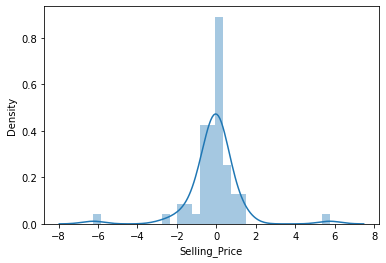

In [68]:
sn.distplot(Y_test - predictions)

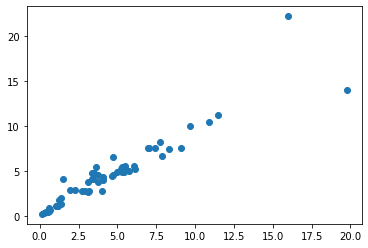

In [70]:
plt.scatter(Y_test , predictions)

In [71]:
import pickle

In [72]:
file = open('random_forest_regression_model.pkl' , 'wb')
pickle.dump(rf_random , file)